In [1]:
# Import necessary libraries and modules
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from rides_pipeline import RideBookings

In [2]:
# Create ride object from rides pipeline
ride = RideBookings()
ride.load_pipeline()
df = ride.df

2025-12-02 14:04:33,120 - rides_pipeline.RideBookings - INFO - CSV file read successfully.
2025-12-02 14:04:33,487 - rides_pipeline.RideBookings - INFO - No exact duplicate rows found.
2025-12-02 14:04:33,631 - rides_pipeline.RideBookings - INFO - Date column contains 0 blank values.
2025-12-02 14:04:33,652 - rides_pipeline.RideBookings - INFO - Time column contains 0 blank values.
2025-12-02 14:04:33,667 - rides_pipeline.RideBookings - INFO - Booking ID column contains 0 blank values.
2025-12-02 14:04:33,685 - rides_pipeline.RideBookings - INFO - Booking Status column contains 0 blank values.
2025-12-02 14:04:33,706 - rides_pipeline.RideBookings - INFO - Customer ID column contains 0 blank values.
2025-12-02 14:04:33,721 - rides_pipeline.RideBookings - INFO - Vehicle Type column contains 0 blank values.
2025-12-02 14:04:33,742 - rides_pipeline.RideBookings - INFO - Pickup Location column contains 0 blank values.
2025-12-02 14:04:33,760 - rides_pipeline.RideBookings - INFO - Drop Locat

In [3]:
# # Display all columns
pd.set_option('display.max_columns', None)

# See total rows and columns
print(df.shape)

(150000, 21)


In [4]:
# See brief details about numerical values in dataset
print(df.describe())

            Avg VTAT       Avg CTAT  Cancelled Rides by Customer  \
count  139500.000000  102000.000000                      10500.0   
mean        8.456352      29.149636                          1.0   
std         3.773564       8.902577                          0.0   
min         2.000000      10.000000                          1.0   
25%         5.300000      21.600000                          1.0   
50%         8.300000      28.800000                          1.0   
75%        11.300000      36.800000                          1.0   
max        20.000000      45.000000                          1.0   

       Cancelled Rides by Driver  Incomplete Rides  Booking Value  \
count                    27000.0            9000.0  102000.000000   
mean                         1.0               1.0     508.295912   
std                          0.0               0.0     395.805774   
min                          1.0               1.0      50.000000   
25%                          1.0          

In [5]:
# See all column names
booking_columns = df.columns
print(booking_columns)

Index(['Date', 'Time', 'Booking ID', 'Booking Status', 'Customer ID',
       'Vehicle Type', 'Pickup Location', 'Drop Location', 'Avg VTAT',
       'Avg CTAT', 'Cancelled Rides by Customer',
       'Reason for cancelling by Customer', 'Cancelled Rides by Driver',
       'Driver Cancellation Reason', 'Incomplete Rides',
       'Incomplete Rides Reason', 'Booking Value', 'Ride Distance',
       'Driver Ratings', 'Customer Rating', 'Payment Method'],
      dtype='object')


In [6]:
# See first 5 rows
df.head(5)

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,CNR5884300,No Driver Found,CID1982111,eBike,Palam Vihar,Jhilmil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,CNR1326809,Incomplete,CID4604802,Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,NaN,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,CNR8494506,Completed,CID9202816,Auto,Khandsa,Malviya Nagar,13.4,25.8,NaN,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,CNR8906825,Completed,CID2610914,Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,NaN,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,CNR1950162,Completed,CID9933542,Bike,Ghitorni Village,Khan Market,5.3,19.6,NaN,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI


In [7]:
# Check for unique booking status
booking_status = df['Booking Status'].unique()
print(booking_status)

['No Driver Found' 'Incomplete' 'Completed' 'Cancelled by Driver'
 'Cancelled by Customer']


In [8]:
status = df['Booking Status'].value_counts()
print(status)

Booking Status
Completed                93000
Cancelled by Driver      27000
No Driver Found          10500
Cancelled by Customer    10500
Incomplete                9000
Name: count, dtype: int64


Shows most bookings were completed and more rides were cancelled by drivers, more than double of customer cancellations.

In [9]:
# Since the focus of the project is customer satisfaction / ratings
# rows with missing Driver Ratings or Customer Ratings are excluded
new_df = df[(df['Driver Ratings'].notna()) | (df['Customer Rating'].notna())] 
print(new_df.head(5))

         Date      Time  Booking ID Booking Status Customer ID   Vehicle Type  \
2  2024-08-23  08:56:10  CNR8494506      Completed  CID9202816           Auto   
3  2024-10-21  17:17:25  CNR8906825      Completed  CID2610914  Premier Sedan   
4  2024-09-16  22:08:00  CNR1950162      Completed  CID9933542           Bike   
5  2024-02-06  09:44:56  CNR4096693      Completed  CID4670564           Auto   
6  2024-06-17  15:45:58  CNR2002539      Completed  CID6800553        Go Mini   

       Pickup Location  Drop Location  Avg VTAT  Avg CTAT  \
2              Khandsa  Malviya Nagar      13.4      25.8   
3  Central Secretariat       Inderlok      13.1      28.5   
4     Ghitorni Village    Khan Market       5.3      19.6   
5                AIIMS    Narsinghpur       5.1      18.1   
6             Vaishali   Punjabi Bagh       7.1      20.4   

   Cancelled Rides by Customer Reason for cancelling by Customer  \
2                          NaN                               NaN   
3         

In [10]:

bookings_df = new_df.copy()

# Impute Avg VTAT with median per Vehicle Type
bookings_df['Avg VTAT'] = bookings_df.groupby('Vehicle Type')['Avg VTAT'].transform(
    lambda x: x.fillna(x.median())
)

# Impute Avg CTAT with median per Vehicle Type
bookings_df['Avg CTAT'] = bookings_df.groupby('Vehicle Type')['Avg CTAT'].transform(
    lambda x: x.fillna(x.median())
)

# Create hour column from Time if needed
bookings_df['Hour'] = pd.to_datetime(bookings_df['Time'], format="%H:%M:%S", errors='coerce').dt.hour

# Booking Value
bookings_df['Booking Value'] = bookings_df.groupby(['Vehicle Type','Hour'])['Booking Value'].transform(
    lambda x: x.fillna(x.median())
)

# Ride Distance
bookings_df['Ride Distance'] = bookings_df.groupby(['Vehicle Type','Hour'])['Ride Distance'].transform(
    lambda x: x.fillna(x.median())
)

In [11]:
# Average driver ratings
average_driver_rating = round(bookings_df['Driver Ratings'].mean(), 2)
print(average_driver_rating)

4.23


In [12]:
average_driver_rating_per_vehicle_type = bookings_df.groupby('Vehicle Type')['Driver Ratings'].mean().sort_values(ascending=False)
print(average_driver_rating_per_vehicle_type)

Vehicle Type
Uber XL          4.238340
Premier Sedan    4.234865
Auto             4.232369
Go Sedan         4.231812
Bike             4.230056
Go Mini          4.227694
eBike            4.225614
Name: Driver Ratings, dtype: float64


C:\Users\user\AppData\Local\Temp\ipykernel_26888\3222644628.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_rating_per_bin = bookings_df.groupby('VTAT_bin')['Driver Ratings'].mean()


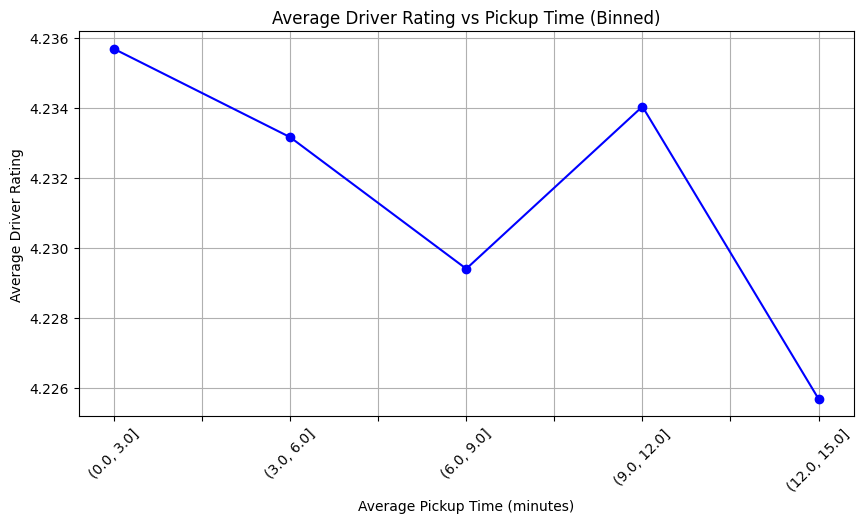

In [13]:
# Check for correlation between ratings given to driver and average time of arrival
# i.e, The longer pickup wait time, the lower the rating.

# Create 5 equally spaced bins from 0 to max pickup time
bins = np.linspace(0, bookings_df['Avg VTAT'].max(), 6)

bookings_df['VTAT_bin'] = pd.cut(bookings_df['Avg VTAT'], bins)

# Calculate average rating per bin
avg_rating_per_bin = bookings_df.groupby('VTAT_bin')['Driver Ratings'].mean()

# Plot binned averages
plt.figure(figsize=(10, 5))
avg_rating_per_bin.plot(marker='o', color='blue')
plt.xlabel('Average Pickup Time (minutes)')
plt.ylabel('Average Driver Rating')
plt.title('Average Driver Rating vs Pickup Time (Binned)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [14]:
ds = bookings_df['Avg CTAT'].max()
print(ds)

45.0


C:\Users\user\AppData\Local\Temp\ipykernel_26888\2600996927.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_rating_ctat = bookings_df.groupby('CTAT_bin')['Driver Ratings'].mean()


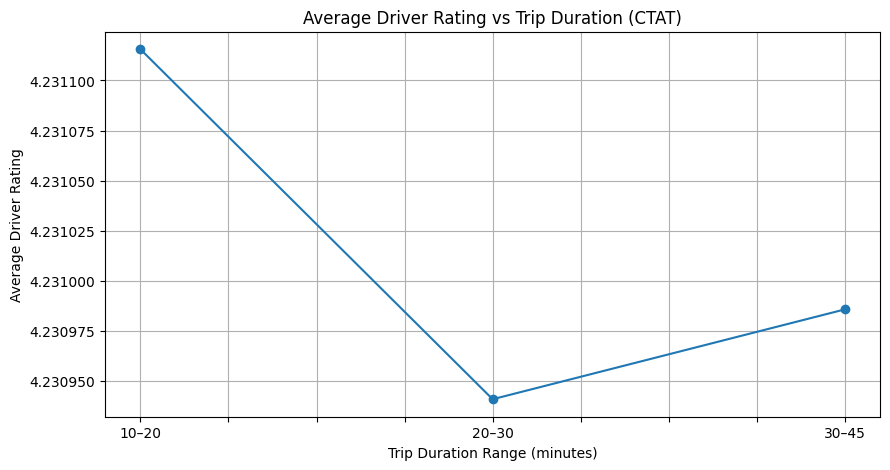

In [15]:
# Does trip duration affect customer satisfaction
# Check for correlation between ratings given to driver and average trip duration
# i.e, The longer the trip, the lower the rating.


# Define bins based on CTAT meaning
bins = [0, 5, 10, 20, 30, 45]
labels = ['0–5', '5–10', '10–20', '20–30', '30–45']

bookings_df['CTAT_bin'] = pd.cut(bookings_df['Avg CTAT'], bins=bins, labels=labels, include_lowest=True)

# Average ratings per CTAT range
avg_rating_ctat = bookings_df.groupby('CTAT_bin')['Driver Ratings'].mean()

# Plot
plt.figure(figsize=(10,5))
avg_rating_ctat.plot(marker='o')
plt.title("Average Driver Rating vs Trip Duration (CTAT)")
plt.xlabel("Trip Duration Range (minutes)")
plt.ylabel("Average Driver Rating")
plt.grid(True)
plt.show()


The dataset does not contain short-distance trips (0–10 minutes CTAT), so the typical high-rating pattern for short trips does not appear.

Instead, all trips fall into medium and long categories. Ratings decrease from 10–20 minute trips to 20–30 minute trips, then increase slightly for 30–45 minute trips. This results in an L-shaped relationship.

Interpretation: Medium-duration trips (20–30 minutes) may involve more congestion or fare sensitivity, leading to lower ratings. Longer trips (30–45 minutes) tend to meet rider expectations and receive slightly higher ratings.

In [16]:
# Check for the size of each bin
bookings_df['CTAT_bin'].value_counts().sort_index()


CTAT_bin
0–5          0
5–10         0
10–20    15481
20–30    31030
30–45    46489
Name: count, dtype: int64

In [17]:
# # Text analysis on cancellation reasons to identify themes
# Reasons Customers cancel rides
cancellation_reasons_customer = df[df['Reason for cancelling by Customer'].notna()]
reasons_customer = cancellation_reasons_customer['Reason for cancelling by Customer'].value_counts()
print(reasons_customer)

Reason for cancelling by Customer
Wrong Address                                   2362
Change of plans                                 2353
Driver is not moving towards pickup location    2335
Driver asked to cancel                          2295
AC is not working                               1155
Name: count, dtype: int64


C:\Users\user\AppData\Local\Temp\ipykernel_26888\1107001891.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cancellation_reasons_customer['Hour'] = pd.to_datetime(cancellation_reasons_customer['Time'], format="%H:%M:%S", errors='coerce').dt.hour


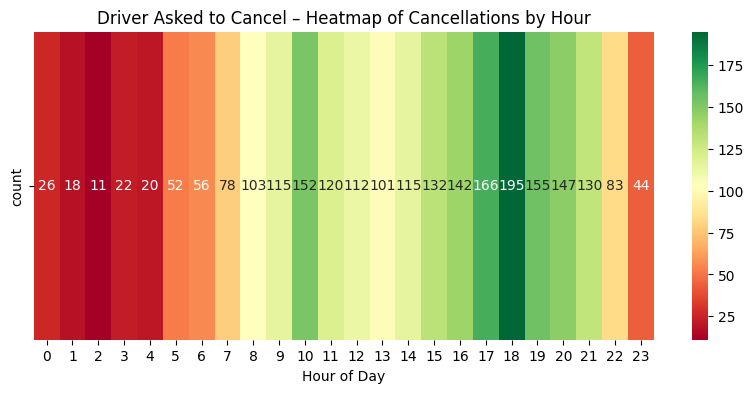

In [18]:
# Create hour column to check if driver asking for rides to be cancelled is time related
cancellation_reasons_customer['Hour'] = pd.to_datetime(cancellation_reasons_customer['Time'], format="%H:%M:%S", errors='coerce').dt.hour
drivers_asked_to_cancel = cancellation_reasons_customer[cancellation_reasons_customer['Reason for cancelling by Customer'] == 'Driver asked to cancel']


hp_df = drivers_asked_to_cancel['Hour'].value_counts().sort_index().to_frame()

plt.figure(figsize=(10, 4))
sns.heatmap(hp_df.T, annot=True, fmt='d', cmap='RdYlGn')
# sns.heatmap(hp_df.T, annot=True, fmt='d', cmap='viridis')

plt.title("Driver Asked to Cancel – Heatmap of Cancellations by Hour")
plt.ylabel("")  # Remove y label because it's just one row
plt.xlabel("Hour of Day")
plt.show()


Drivers asking customers to cancel is most common between 5pm and 8pm, with the peak at 6pm (195 cancellations). This corresponds with evening rush hour, when traffic is heavy and drivers may avoid long pickups or low-fare trips.

A secondary peak occurs around 10am–12pm, also reflecting moderate traffic and high trip volume.

Cancellation requests are lowest between 12am and 6am, when traffic is light and drivers are more willing to accept all available rides.

In [19]:
# Reasons Drivers cancel rides
cancellation_reasons_driver = df[df['Driver Cancellation Reason'].notna()]
reasons_driver = cancellation_reasons_driver['Driver Cancellation Reason'].value_counts()
print(reasons_driver)

Driver Cancellation Reason
Customer related issue                 6837
The customer was coughing/sick         6751
Personal & Car related issues          6726
More than permitted people in there    6686
Name: count, dtype: int64


Customer cancellations are primarily driven by operational issues such as entering the wrong pickup address (2362), change of plans (2353), and drivers not moving toward the pickup location (2335). A notable 2295 cases also involved drivers asking customers to cancel, which indicates potential misuse of cancellation policies.

Drivers, on the other hand, cancel rides mainly due to customer-related issues (6837), health concerns such as coughing or illness (6751), personal or vehicle issues (6726), and cases where passengers attempt to board more than the permitted number of people (6686).

These findings highlight a need for improved location accuracy, stronger enforcement of driver compliance, and clearer communication of passenger safety guidelines.

<Figure size 1200x600 with 0 Axes>

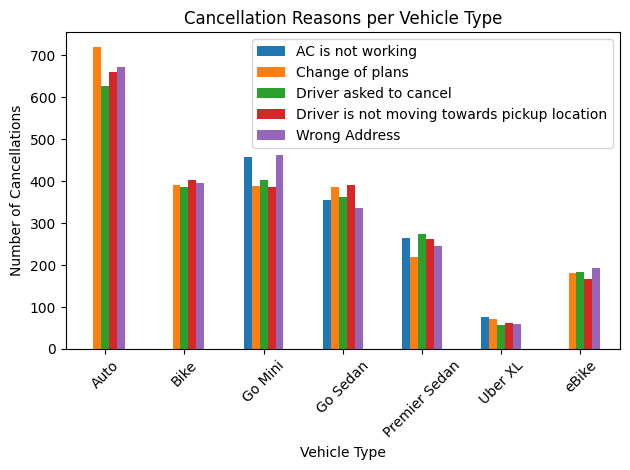

In [20]:
reasons_for_cancelling_per_vehicle = (
    cancellation_reasons_customer[['Vehicle Type','Reason for cancelling by Customer']]
    .value_counts()
)


# Convert Series → DataFrame → Pivot Table
df_plot = (
    reasons_for_cancelling_per_vehicle
    .reset_index(name='Count')
    .pivot(index='Vehicle Type', columns='Reason for cancelling by Customer', values='Count')
    .fillna(0)
)

# Plot
plt.figure(figsize=(12, 6))

df_plot.plot(kind='bar')
plt.xlabel("Vehicle Type")
plt.ylabel("Number of Cancellations")
plt.title("Cancellation Reasons per Vehicle Type")
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.tight_layout()
plt.show()


In [21]:
incomplete_rides = df[df['Incomplete Rides'].notna()]
reasons = incomplete_rides['Incomplete Rides Reason'].value_counts()
print(reasons)

Incomplete Rides Reason
Customer Demand      3040
Vehicle Breakdown    3012
Other Issue          2948
Name: count, dtype: int64


In [22]:
completed_rides = df[(df['Incomplete Rides'].isna()) & (df['Booking Value'].notna())]
total_revenue = completed_rides['Booking Value'].sum()
print(total_revenue)

47260574.0


In [ ]:
df.head(2)